In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import
import tensorflow as tf
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM

from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification

import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, log_loss, confusion_matrix
from sklearn.utils import class_weight

import os
import io
import warnings
warnings.filterwarnings('ignore')

In [3]:
#pip install missingno

# Our dataset üßê

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/Data /JEDHA/Fullstack/deep_learning/spam_detector_project/spam.csv", encoding="latin1")
dataset.head(10)

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN        NaN  
7        NaN        NaN  
8        NaN        NaN  
9        NaN        NaN

In [5]:
dataset.shape

(5572, 5)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


 Missing values

In [7]:
# missing values percentage
dataset.isnull().sum()/dataset.shape[0]*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

<Axes: >

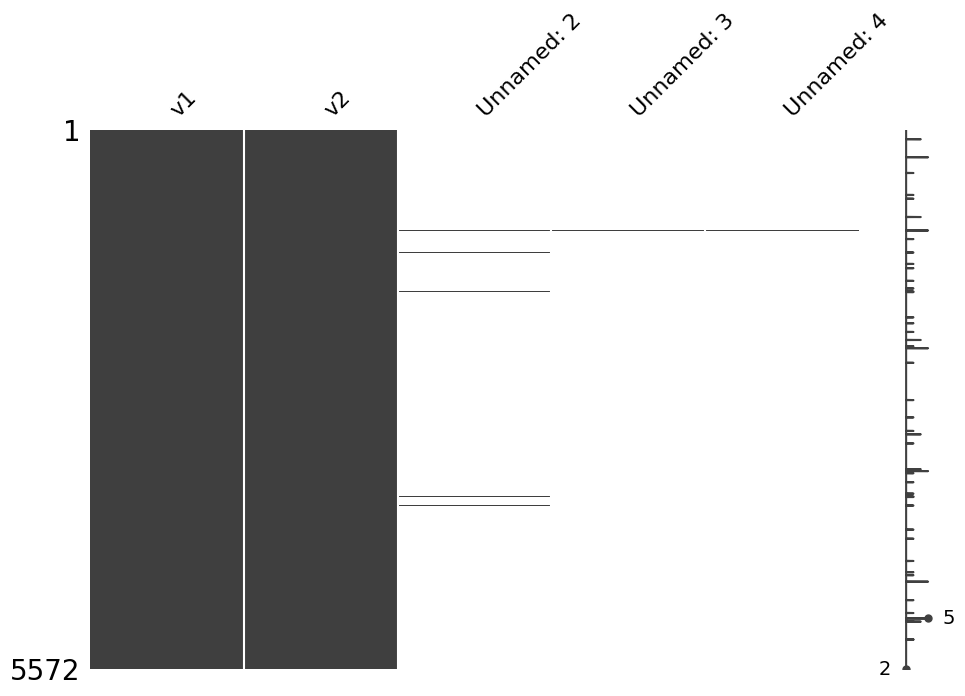

In [8]:
# missing values viz
msno.matrix(dataset, figsize = (11,7))

In [9]:
# Let's explore those rows where [Unnamed: 2","Unnamed: 3","Unnamed: 4"] have values
subset_columns =["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
filtered_df = dataset.dropna(subset=subset_columns, how='all')

filtered_df

v1                                                 v2  \
95    spam  Your free ringtone is waiting to be collected....   
281    ham                                \Wen u miss someone   
444    ham  \HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...   
671   spam         SMS. ac sun0819 posts HELLO:\You seem cool   
710    ham  Height of Confidence: All the Aeronautics prof...   
899   spam  Your free ringtone is waiting to be collected....   
1038   ham  Edison has rightly said, \A fool can ask more ...   
1127   ham  Height of \Oh shit....!!\" situation: A guy th...   
1266   ham    \Hey sorry I didntgive ya a a bellearlier hunny   
1384   ham  Storming msg: Wen u lift d phne, u say \HELLO\...   
1428   ham  Tell you what, if you make a little spreadshee...   
1559   ham  Single line with a big meaning::::: \Miss anyt...   
1637  spam  0A$NETWORKS allow companies to bill for SMS, s...   
1669   ham  Very hurting n meaningful lines ever: \I compr...   
1675   ham  Painful words- \I thought being Happy was the ...   
1936   ham      My planning usually stops at \find hella weed   
1937   ham  The fact that you're cleaning shows you know w...   
1997   ham                    \YEH I AM DEF UP4 SOMETHING SAT   
2087   ham                                      \alright babe   
2170   ham  \CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...   
2235   ham  \Si.como no?!listened2the plaid album-quite gd...   
2255   ham      I just lov this line: \Hurt me with the truth   
2406   ham  One of best dialogue in cute reltnship..!! \We...   
2791   ham  ¬â√õ_ we r stayin here an extra week, back next ...   
2970   ham  Height of Confidence: All the Aeronautics prof...   
3110   ham               Short But Cute : \ Be a good person    
3145   ham               \SHIT BABE.. THASA BIT MESSED UP.YEH   
3239   ham  A cute thought for friendship: \Its not necess...   
3506   ham               Two fundamentals of cool life: \Walk   
3525   ham  \HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...   
3547   ham  Single line with a big meaning::::: \Miss anyt...   
3640  spam  You can stop further club tones by replying \S...   
3758   ham  GOD ASKED, \What is forgiveness?\" A little ch...   
3788   ham              Are you sure you don't mean \get here   
3793   ham                  Short But Cute: \Be a good person   
3881   ham                  Short But Cute: \Be a good person   
4130   ham  \Its Ur luck to Love someone. Its Ur fortune t...   
4224   ham  \The world suffers a lot... Not because of the...   
4454   ham  Storming msg: Wen u lift d phne, u say \HELLO\...   
4455   ham  If you want to mapquest it or something look u...   
4570   ham                 \CHA QUITEAMUZING THAT√•√ïSCOOL BABE   
4601   ham                     \Hey j! r u feeling any better   
4668   ham  When I was born, GOD said, \Oh No! Another IDI...   
4859   ham  \Response\" is one of d powerful weapon 2 occu...   
4992   ham                                          \HEY KATE   
5048   ham  Edison has rightly said, \A fool can ask more ...   
5079   ham                      \Keep ur problems in ur heart   
5081   ham  \HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VI...   
5264   ham  Storming msg: Wen u lift d phne, u say \HELLO\...   
5268   ham                                                \ER   

                                             Unnamed: 2  \
95                                          PO Box 5249   
281    the person is definitely special for u..... B...   
444    HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...   
671    wanted to say hi. HI!!!\" Stop? Send STOP to ...   
710     this wont even start........ Datz confidence.."   
899                                         PO Box 5249   
1038                                                 GN   
1127                                           .;-):-D"   
1266  just been in bedbut mite go 2 thepub l8tr if u...   
1384   bt not his girlfrnd... G o o d n i g h t . . .@"   
1428                                   

In [10]:
# Let's concatenate to get full texts (filtered_df shows that some messages are split) #

column_names = ['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

# Fill missing values in the columns with empty strings and concatenate
dataset['full_messages'] = ''
for col in column_names:
    dataset['full_messages'] += ' ' + dataset[col].fillna('')


In [11]:
# Let's take a look
dataset[dataset['Unnamed: 2'].isna()==False].head(15)

v1                                                 v2  \
95    spam  Your free ringtone is waiting to be collected....   
281    ham                                \Wen u miss someone   
444    ham  \HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...   
671   spam         SMS. ac sun0819 posts HELLO:\You seem cool   
710    ham  Height of Confidence: All the Aeronautics prof...   
899   spam  Your free ringtone is waiting to be collected....   
1038   ham  Edison has rightly said, \A fool can ask more ...   
1127   ham  Height of \Oh shit....!!\" situation: A guy th...   
1266   ham    \Hey sorry I didntgive ya a a bellearlier hunny   
1384   ham  Storming msg: Wen u lift d phne, u say \HELLO\...   
1428   ham  Tell you what, if you make a little spreadshee...   
1559   ham  Single line with a big meaning::::: \Miss anyt...   
1637  spam  0A$NETWORKS allow companies to bill for SMS, s...   
1669   ham  Very hurting n meaningful lines ever: \I compr...   
1675   ham  Painful words- \I thought being Happy was the ...   

                                             Unnamed: 2  \
95                                          PO Box 5249   
281    the person is definitely special for u..... B...   
444    HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...   
671    wanted to say hi. HI!!!\" Stop? Send STOP to ...   
710     this wont even start........ Datz confidence.."   
899                                         PO Box 5249   
1038                                                 GN   
1127                                           .;-):-D"   
1266  just been in bedbut mite go 2 thepub l8tr if u...   
1384   bt not his girlfrnd... G o o d n i g h t . . .@"   
1428                                      I'll come up"   
1559   don't miss ur best life for anything... Gud n...   
1637   just as a shop has to give a guarantee on wha...   
1669   But at d end my love compromised me for every...   
1675   the toughest is acting Happy with all unspoke...   

                 Unnamed: 3                      Unnamed: 4  \
95     MK17 92H. 450Ppw 16"                             NaN   
281        why to miss them   just Keep-in-touch\" gdeve.."   
444                     NaN                             NaN   
671                     NaN                             NaN   
710                     NaN                             NaN   
899    MK17 92H. 450Ppw 16"                             NaN   
1038                     GE                         GNT:-)"   
1127                    NaN                             NaN   
1266                    NaN                             NaN   
1384                    NaN                             NaN   
1428                    NaN                             NaN   
1559                    NaN                             NaN   
1637                    NaN                             NaN   
1669                    NaN                             NaN   
1675                    NaN                             NaN   

                                          full_messages  
95     Your free ringtone is waiting to be collected...  
281    \Wen u miss someone  the person is definitely...  
444    \HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYA...  
671    SMS. ac sun0819 posts HELLO:\You seem cool  w...  
710    Height of Confidence: All the Aeronautics pro...  
899    Your free ringtone is waiting to be collected...  
1038   Edison has rightly said, \A fool can ask more...  
1127   Height of \Oh shit....!!\" situation: A guy t...  
1266   \Hey sorry I didntgive ya a a bellearlier hun...  
1384   Storming msg: Wen u lift d phne, u say \HELLO...  
1428   Tell you what, if you make a little spreadshe...  
1559   Single line with a big meaning::::: \Miss any...  
1637   0A$NETWORKS allow companies to bill for SMS, ...  
1669   Very hurting n meaningful lines ever: \I comp...  
1675   Painful words- \I thought being Happy was the...

In [12]:
# creating dataframe with v1, full_message columns
spam_df = dataset[['v1', 'full_messages']]

# renaming column v1 to 'labels'
spam_df.rename(columns={"v1" : "labels"}, inplace=True)

spam_df.head()

labels                                      full_messages
0    ham   Go until jurong point, crazy.. Available only...
1    ham                   Ok lar... Joking wif u oni...   
2   spam   Free entry in 2 a wkly comp to win FA Cup fin...
3    ham   U dun say so early hor... U c already then sa...
4    ham   Nah I don't think he goes to usf, he lives ar...

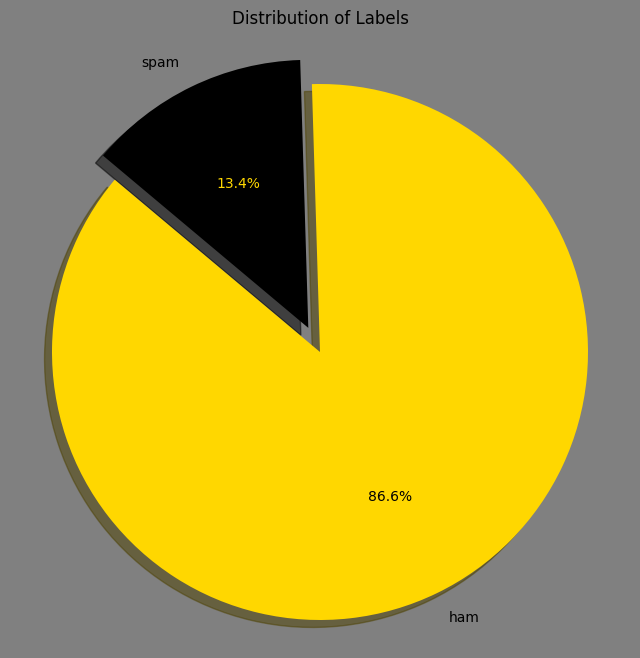

In [13]:
# target distribution
label_counts = spam_df['labels'].value_counts()

plt.figure(figsize=(8, 8), facecolor = "grey")
patches, texts, autotexts  = plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors = ["gold", "black"], explode=(0.1, 0), shadow=True)
autotexts[1].set_color('gold')
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

# **Preprocessing** üõ†

In [14]:
# let's make sure that all the messages are in string type
mask_str = spam_df["full_messages"].apply(lambda x: isinstance(x, str))
print("Percentage of strings in column below is: ")
mask_str.value_counts()/spam_df.shape[0]*100

Percentage of strings in column below is: 


full_messages
True    100.0
Name: count, dtype: float64

In [15]:
# spaCy Medium English language model
!python -m spacy download en_core_web_md -q

‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:
# Import Spacy and English initialisation
import en_core_web_md
nlp = en_core_web_md.load()


In [17]:
# Import Stop words
from spacy.lang.en.stop_words import STOP_WORDS

Cleaning textsüßπ

In [18]:
# remove all characters from messages that are not alphanumeric except for whitespaces, and apostrophies.
spam_df["messages_clean"] = spam_df["full_messages"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" " or ch=="'"))

# replace double whitespaces or more with single whitespaces, convert all characters to lowercase and trim starting and finishing whitespaces.
spam_df["messages_clean"] = spam_df["messages_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())

# replace all tokens with lemma_ and remove all the stop words.
spam_df["messages_clean"] = spam_df["messages_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))

spam_df.head()

labels                                      full_messages  \
0    ham   Go until jurong point, crazy.. Available only...   
1    ham                   Ok lar... Joking wif u oni...      
2   spam   Free entry in 2 a wkly comp to win FA Cup fin...   
3    ham   U dun say so early hor... U c already then sa...   
4    ham   Nah I don't think he goes to usf, he lives ar...   

                                      messages_clean  
0  jurong point crazy available bugis n great wor...  
1                              ok lar joke wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                                u dun early hor u c  
4                                 nah think usf live

In [19]:
# let's make sure that no message has been erased
spam_df.isnull().sum()

labels            0
full_messages     0
messages_clean    0
dtype: int64

In [20]:
# let's encode the messages
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="out_of_vocab")
tokenizer.fit_on_texts(spam_df.messages_clean)
spam_df["messages_encoded"] = tokenizer.texts_to_sequences(spam_df.messages_clean)

In [ ]:
spam_df.head()

labels                                      full_messages  \
0    ham   Go until jurong point, crazy.. Available only...   
1    ham                   Ok lar... Joking wif u oni...      
2   spam   Free entry in 2 a wkly comp to win FA Cup fin...   
3    ham   U dun say so early hor... U c already then sa...   
4    ham   Nah I don't think he goes to usf, he lives ar...   

                                      messages_clean  \
0  jurong point crazy available bugis n great wor...   
1                              ok lar joke wif u oni   
2  free entry 2 wkly comp win fa cup final tkts 2...   
3                                u dun early hor u c   
4                                 nah think usf live   

                                    messages_encoded  
0  [1, 235, 448, 463, 943, 32, 51, 209, 944, 78, ...  
1                           [9, 196, 464, 291, 2, 1]  
2  [11, 302, 3, 531, 660, 30, 1, 850, 425, 1, 1, ...  
3                            [2, 126, 150, 1, 2, 80]  
4                                [708, 20, 661, 131]

In [21]:
spam_df.shape

(5572, 4)

In [22]:
# Let's convert our categorical labels into numerical format using a label encoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(spam_df.labels)

In [23]:
# before creating a tensor dataset we will pad the sequences so that they have the same length
messages_pad = tf.keras.preprocessing.sequence.pad_sequences(spam_df.messages_encoded, padding="post")
messages_pad

array([[  1, 235, 448, ...,   0,   0,   0],
       [  9, 196, 464, ...,   0,   0,   0],
       [ 11, 302,   3, ...,   0,   0,   0],
       ...,
       [  1, 939,   1, ...,   0,   0,   0],
       [114,   1,   1, ...,   0,   0,   0],
       [  1, 314,   0, ...,   0,   0,   0]], dtype=int32)

Split train / Val ü™ì

In [24]:
xtrain, xval, ytrain, yval = train_test_split(messages_pad, encoded_labels, test_size= 0.3, stratify= encoded_labels) # Since we have unbalanced target distribution we stratify (we'll consider data augmentation for example later)

In [25]:
# Let's create the tensor dataset for the training and validation set
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))

In [26]:
# Now let's shuffle and organize by batch
train_batch = train.shuffle(len(train)).batch(32)
val_batch = val.shuffle(len(val)).batch(32)

In [27]:
# we take a look at one batch
for batch in train_batch.take(1):
  print(batch)

(<tf.Tensor: shape=(32, 74), dtype=int32, numpy=
array([[396, 256,   1, ...,   0,   0,   0],
       [  1, 128,   1, ...,   0,   0,   0],
       [  1, 894,   1, ...,   0,   0,   0],
       ...,
       [607,  54,   1, ...,   0,   0,   0],
       [ 74,   7,  89, ...,   0,   0,   0],
       [ 20,   1, 450, ...,   0,   0,   0]], dtype=int32)>, <tf.Tensor: shape=(32,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0])>)


In [28]:
train_batch.element_spec[0].shape[1]


74

## ***Let's dive in*** ü§ø



In [29]:
# Firts we create a function that returns metrics to evaluate our models. That will help to make a comparison later
def evaluate_model(model, y_true, y_pred):


  y_pred = np.round(model.predict(y_pred))
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1_score = f1_score(y_true, y_pred)
  loss = loss(y_true, y_pred)

  metrics_dict = {
      'model': model,
      'accuracy': accuracy,
      'precision': precision,
      'recall': recall,
      'f1_score': f1_score,
      'loss': loss
    }
  return metrics_dict

In [30]:
# We also create a function that returs a confusion matrix for each model
def generate_confusion_matrix(model_name, y_true, y_pred, labels=None):

    cm = confusion_matrix(y_true, y_pred, labels= model_we.classes_)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Word Embedding


## Modeling üë©‚Äçüîß

In [31]:
vocab_size = tokenizer.num_words

model_we = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size + 1, 8, input_shape = (train_batch.element_spec[0].shape[1],), name = "embedding"),

    tf.keras.layers.GlobalAveragePooling1D(),

    tf.keras.layers.Dense(16, activation = 'relu'),

    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

In [32]:
model_we.summary()

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ (None, 74, 8)               ‚îÇ           8,008 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_average_pooling1d             ‚îÇ (None, 8)                   ‚îÇ               0 ‚îÇ
‚îÇ (GlobalAveragePooling1D)             ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 16)                  ‚îÇ             144 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 1)                   ‚îÇ              17 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 8,169 (31.91 KB)

 Trainable params: 8,169 (31.91 KB)

 Non-trainable params: 0 (0.00 B)

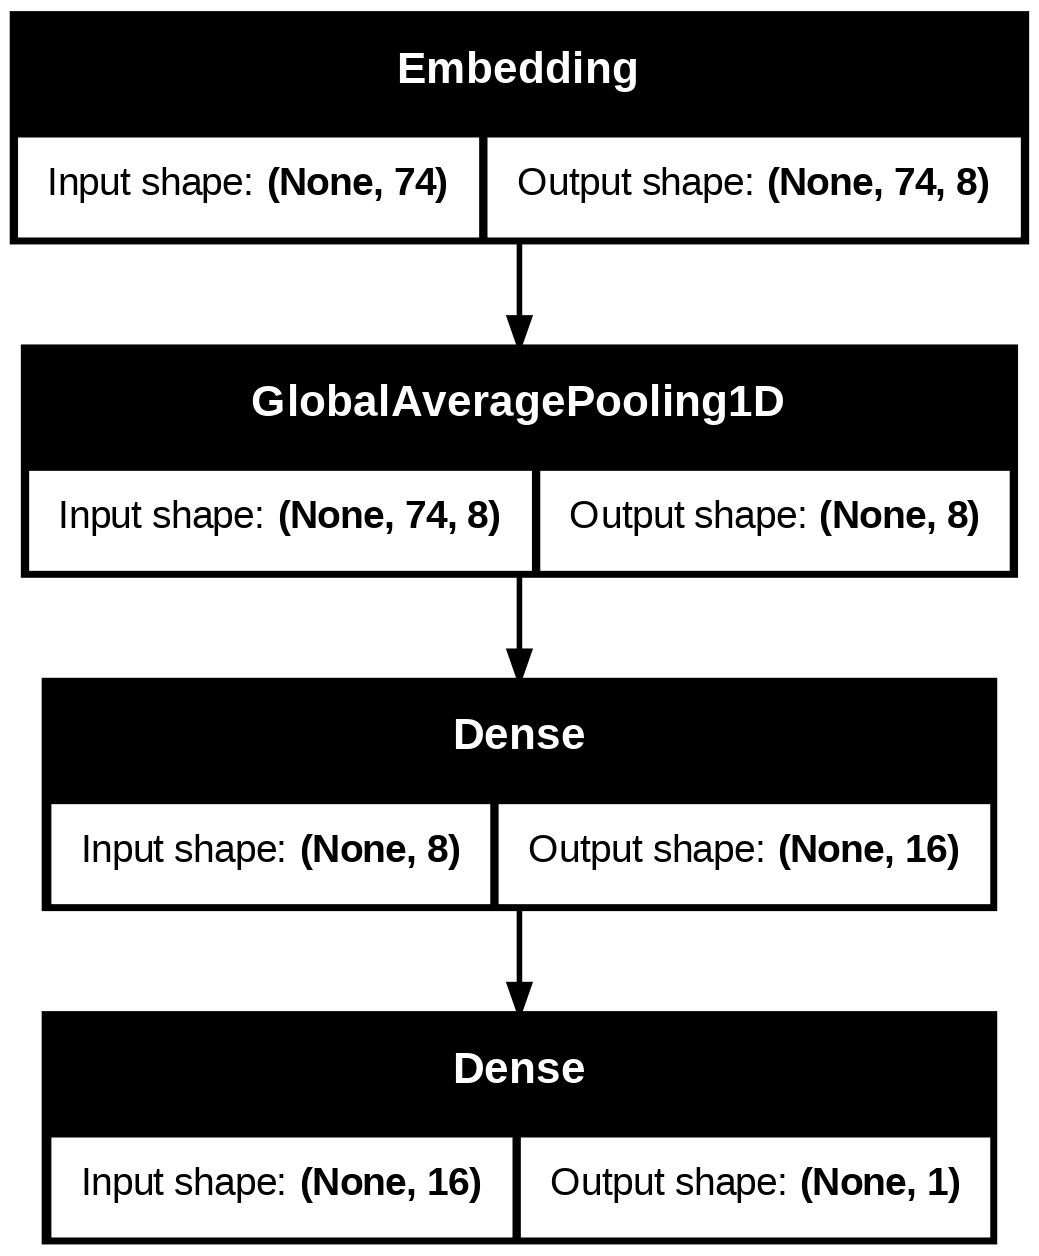

In [33]:
#Plot model
tf.keras.utils.plot_model(model_we, show_shapes=True)

In [34]:
# Compile model
model_we.compile(optimizer = 'adam',
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'] #'precision', 'recall', 'f1_score', 'auc']
                 )

## Training ü§øüèÉ‚Äç‚ôÄÔ∏è

In [35]:
history_we = model_we.fit(train_batch,
                       epochs=50,
                       validation_data = val_batch)

Epoch 1/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 21ms/step - accuracy: 0.8702 - loss: 0.4278 - val_accuracy: 0.8660 - val_loss: 0.3631
Epoch 2/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.8745 - loss: 0.3436 - val_accuracy: 0.8660 - val_loss: 0.3532
Epoch 3/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.8669 - loss: 0.3464 - val_accuracy: 0.8660 - val_loss: 0.3401
Epoch 4/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.8638 - loss: 0.3349 - val_accuracy: 0.8660 - val_loss: 0.3226
Epoch 5/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.8675 - loss: 0.3056 - val_accuracy: 0.8660 - val_loss: 0.2955
Epoch 6/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.8630 - loss: 0.2876 - val_accuracy: 0.8780 - val_loss

## Evaluation üïµÔ∏è‚Äç‚ôÄÔ∏è

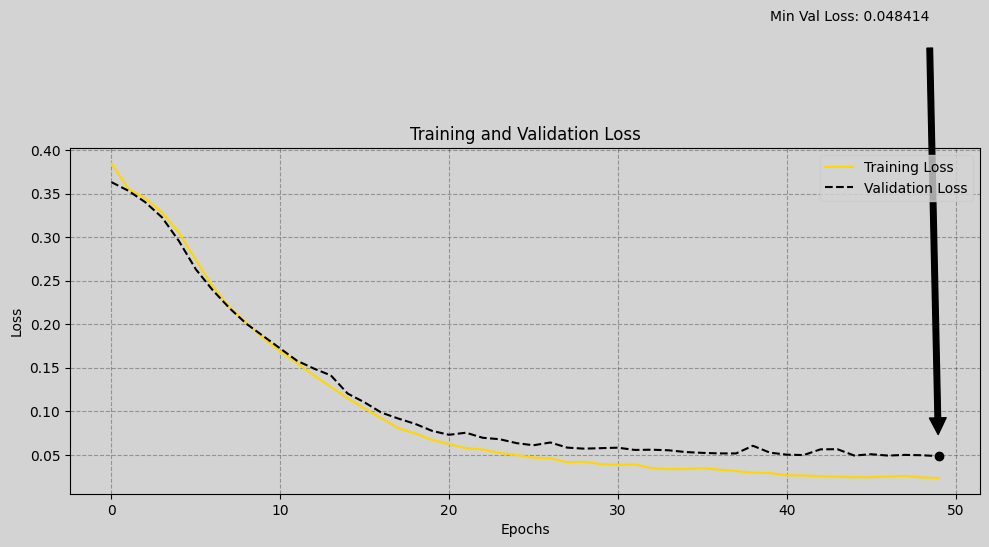

In [36]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightgrey')
ax.set_facecolor('lightgrey')

ax.plot(history_we.history["loss"], label="Training Loss", color="gold", linestyle="-")
ax.plot(history_we.history["val_loss"], label="Validation Loss", color="black", linestyle="--")

ax.set_title("Training and Validation Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.legend()

ax.grid(True, linestyle='--', alpha=0.3, color='black')

min_val_loss = min(history_we.history["val_loss"])
min_val_loss_epoch = history_we.history["val_loss"].index(min_val_loss)
ax.annotate(f'Min Val Loss: {min_val_loss:f}',
             xy=(min_val_loss_epoch, min_val_loss),
             xytext=(min_val_loss_epoch-10, min_val_loss+0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

ax.scatter(min_val_loss_epoch, min_val_loss, color='black', marker='o')

legend = ax.legend(loc='upper right', frameon=True)
legend.get_frame().set_facecolor('lightgrey')

# Show plot
plt.tight_layout()
plt.show()


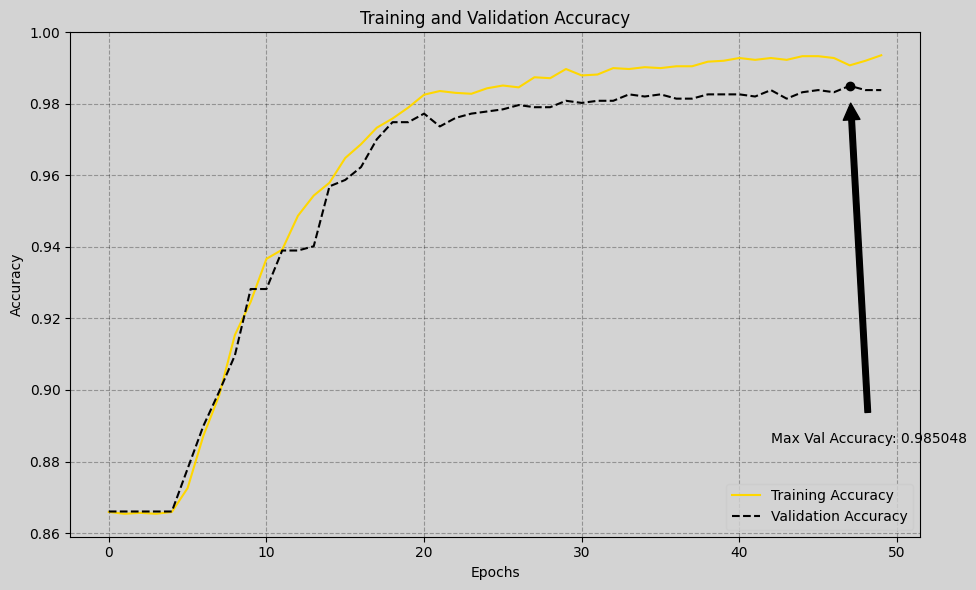

In [38]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightgrey')
ax.set_facecolor('lightgrey')

ax.plot(history_we.history["accuracy"], label="Training Accuracy", color="gold", linestyle="-")
ax.plot(history_we.history["val_accuracy"], label="Validation Accuracy", color="black", linestyle="--")

ax.set_title("Training and Validation Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.legend()

ax.grid(True, linestyle='--', alpha=0.3, color='black')

max_val_acc = max(history_we.history["val_accuracy"])
max_val_acc_epoch = history_we.history["val_accuracy"].index(max_val_acc)
ax.annotate(f'Max Val Accuracy: {max_val_acc:f}',
             xy=(max_val_acc_epoch, max_val_acc),
             xytext=(max_val_acc_epoch-5, max_val_acc-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

ax.scatter(max_val_acc_epoch, max_val_acc, color='black', marker='o')

legend = ax.legend(loc='lower right', frameon=True)
legend.get_frame().set_facecolor('lightgrey')

plt.tight_layout()
plt.show()

Let's test our model on 10 spams and 10 HAM ! ü§ì

In [39]:
messages_received = [
    "Congratulations! You've won a luxury vacation package to the Bahamas! Claim your prize now by clicking the link below!", #fake
    "Urgent: Your account security has been compromised! Please verify your identity by logging in to your account immediately.", #fake
    "Hi there! Just wanted to check in and see how you're doing. Let's catch up soon!",
    "Limited time offer: Get 50% off on all weight loss supplements! Shed those extra pounds fast!",#fake
    "Reminder: Don't forget about our team meeting tomorrow at 10 AM in the conference room.",
    "Hey, did you hear about the new coffee shop that opened downtown? We should check it out sometime!",
    "Thanks for sending over the report. I'll review it and get back to you with any feedback.",
    "You've been selected for a once-in-a-lifetime investment opportunity! Earn guaranteed returns with minimal risk!", #fake
    "Act now and receive a free trial of our revolutionary skincare product! Say goodbye to wrinkles and blemishes!", #fake
    "Good morning! Wishing you a wonderful day ahead filled with positivity and productivity.",
    "Your Amazon account has been suspended! Please update your payment information to avoid permanent closure.", #fake
    "Hi Ellie, I wanted to share this interesting article I came across. I think you'll find it insightful.",
    "Happy birthday! I hope your special day is filled with joy, laughter, and lots of cake!",
    "Need cash fast? Get a payday loan approved instantly with no credit check required!", #fake
    "Just a heads up, there's heavy traffic on your usual route to work. You might want to consider taking an alternate route.",
    "Congratulations! You've been chosen as our lucky winner for a brand new iPhone! Click the link to claim your prize.", #fake
    "Get rich quick! Join our exclusive affiliate marketing program and start earning passive income today!", #fake
    "Attention: Your computer is infected with a virus! Download our antivirus software now to protect your data.", #fake
    "Great job on completing the project ahead of schedule! Your hard work and dedication are truly appreciated.",
    "Hey, are you free this weekend? I was thinking we could go hiking and enjoy the beautiful weather. Let me know if you're interested!"
]

# Create the sequences

sample_sequences = tokenizer.texts_to_sequences(messages_received)
#tokenizer.fit_on_texts(messages_received)
sample_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(sample_sequences, padding='post', maxlen=74)

prediction = model_we.predict(sample_sequences_padded)

# The closer the class is to 1, the more likely that the message is spam
for x in range(len(messages_received)):
  print(messages_received[x])
  print(prediction[x])
  if prediction[x] < 0.5:
    print("REAL!")
  else:
    print("SPAM!")
  print('\n')

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 232ms/step
Congratulations! You've won a luxury vacation package to the Bahamas! Claim your prize now by clicking the link below!
[0.9577589]
SPAM!


Urgent: Your account security has been compromised! Please verify your identity by logging in to your account immediately.
[0.94688016]
SPAM!


Hi there! Just wanted to check in and see how you're doing. Let's catch up soon!
[0.00872562]
REAL!


Limited time offer: Get 50% off on all weight loss supplements! Shed those extra pounds fast!
[0.95681775]
SPAM!


Reminder: Don't forget about our team meeting tomorrow at 10 AM in the conference room.
[0.05235858]
REAL!


Hey, did you hear about the new coffee shop that opened downtown? We should check it out sometime!
[0.20985843]
REAL!


Thanks for sending over the report. I'll review it and get back to you with any feedback.
[0.42717525]
REAL!


You've been selected for a once-in-a-lifetime investment opportunity! Earn guaran

# Simple RNN
# Modeling üë©‚Äçüîß

In [41]:
vocab_size = tokenizer.num_words
model_rnn = tf.keras.Sequential([
                  # Word Embedding layer
                  Embedding(vocab_size+1, 64, input_shape=(train_batch.element_spec[0].shape[1],), name="embedding"),
                  # Gobal average pooling
                  SimpleRNN(units=64, return_sequences=True), # maintains the sequential nature
                  SimpleRNN(units=32, return_sequences=False), # returns the last output
                  # Dense layers once the data is flat
                  Dense(16, activation='relu'),
                  Dense(8, activation='relu'),

                  # output layer with as many neurons as the number of classes
                  # for the target variable and softmax activation
                  Dense(1, activation="sigmoid")
])

In [42]:
model_rnn.summary()

Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ (None, 74, 64)              ‚îÇ          64,064 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ simple_rnn (SimpleRNN)               ‚îÇ (None, 74, 64)              ‚îÇ           8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ simple_rnn_1 (SimpleRNN)             ‚îÇ (None, 32)                  ‚îÇ           3,104 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                      ‚îÇ (None, 16)                  ‚îÇ             528 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                      ‚îÇ (None, 8)                   ‚îÇ             136 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                      ‚îÇ (None, 1)                   ‚îÇ               9 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 76,097 (297.25 KB)

 Trainable params: 76,097 (297.25 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model_rnn.compile(optimizer = 'adam',
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy']
                 )

In [44]:
history_rnn = model_rnn.fit(train_batch,
                       epochs=50,
                       validation_data = val_batch)

Epoch 1/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 77ms/step - accuracy: 0.7874 - loss: 0.6851 - val_accuracy: 0.8660 - val_loss: 0.6517
Epoch 2/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 26ms/step - accuracy: 0.8622 - loss: 0.6428 - val_accuracy: 0.8660 - val_loss: 0.6151
Epoch 3/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 37ms/step - accuracy: 0.8602 - loss: 0.6081 - val_accuracy: 0.8660 - val_loss: 0.5829
Epoch 4/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 25ms/step - accuracy: 0.8634 - loss: 0.5766 - val_accuracy: 0.8660 - val_loss: 0.5552
Epoch 5/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 17ms/step - accuracy: 0.8641 - loss: 0.5498 - val_accuracy: 0.8660 - val_loss: 0.5310
Epoch 6/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 17ms/step - accuracy: 0.8670 - loss: 0.5250 - val_accuracy: 0.8660 - v

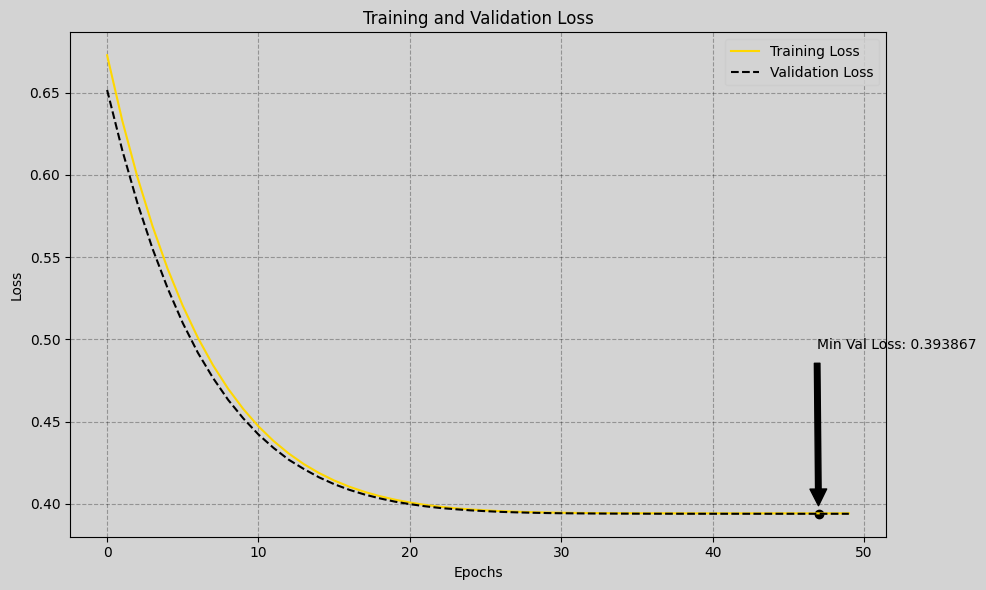

In [46]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightgrey')
ax.set_facecolor('lightgrey')

ax.plot(history_rnn.history["loss"], label="Training Loss", color="gold", linestyle="-")
ax.plot(history_rnn.history["val_loss"], label="Validation Loss", color="black", linestyle="--")

ax.set_title("Training and Validation Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.legend()

ax.grid(True, linestyle='--', alpha=0.3, color='black')

min_val_loss = min(history_rnn.history["val_loss"])
min_val_loss_epoch = history_rnn.history["val_loss"].index(min_val_loss)
ax.annotate(f'Min Val Loss: {min_val_loss:f}',
             xy=(min_val_loss_epoch, min_val_loss),
             xytext=(min_val_loss_epoch-0.1, min_val_loss+0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

ax.scatter(min_val_loss_epoch, min_val_loss, color='black', marker='o')

legend = ax.legend(loc='upper right', frameon=True)
legend.get_frame().set_facecolor('lightgrey')

plt.tight_layout()
plt.show()

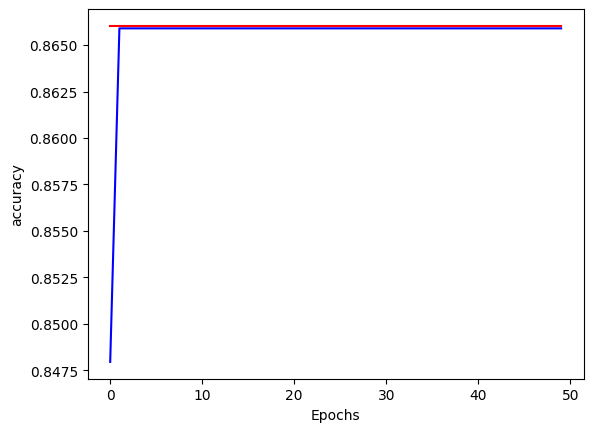

In [47]:
plt.plot(history_rnn.history["accuracy"], color="b")
plt.plot(history_rnn.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

# Simple GRU
# Modeling üë©‚Äçüîß

In [48]:
vocab_size = tokenizer.num_words

model_gru = tf.keras.Sequential([
                  Embedding(vocab_size+1, 16, input_shape=(train_batch.element_spec[0].shape[1],),name="embedding"),
                  #GRU(units=64, return_sequences=True), # maintains the sequential nature
                  GRU(units=16, return_sequences=False), # returns the last output
                  #Dense(16, activation='relu'),
                  #Dense(8, activation='relu'),

                  Dense(1, activation="sigmoid")
])

In [49]:
model_gru.summary()

Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ (None, 74, 16)              ‚îÇ          16,016 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ gru (GRU)                            ‚îÇ (None, 16)                  ‚îÇ           1,632 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                      ‚îÇ (None, 1)                   ‚îÇ              17 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 17,665 (69.00 KB)

 Trainable params: 17,665 (69.00 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model_gru.compile(optimizer = 'adam',
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy']
                 )

In [51]:
history_gru = model_gru.fit(train_batch,
                       epochs=50,
                       validation_data = val_batch)

Epoch 1/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 8ms/step - accuracy: 0.8086 - loss: 0.4896 - val_accuracy: 0.8660 - val_loss: 0.3943
Epoch 2/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - accuracy: 0.8662 - loss: 0.3950 - val_accuracy: 0.8660 - val_loss: 0.3946
Epoch 3/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - accuracy: 0.8687 - loss: 0.3899 - val_accuracy: 0.8660 - val_loss: 0.3941
Epoch 4/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.8632 - loss: 0.3998 - val_accuracy: 0.8660 - val_loss: 0.3998
Epoch 5/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - accuracy: 0.8525 - loss: 0.4246 - val_accuracy: 0.8660 - val_loss: 0.3964
Epoch 6/50
122/122 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.8634 - loss: 0.4005 - val_accuracy: 0.8660 - val_loss:

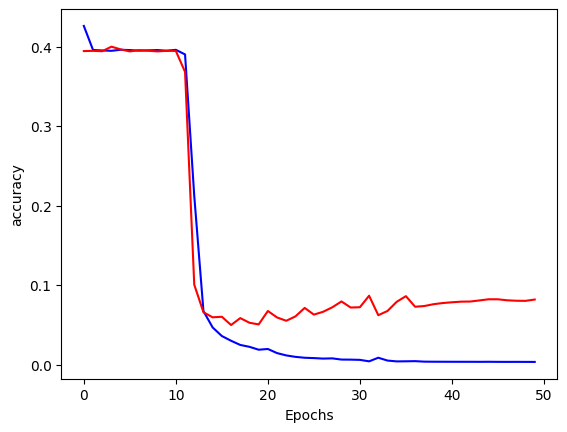

In [52]:
plt.plot(history_gru.history["loss"], color="b")
plt.plot(history_gru.history["val_loss"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

# LSTM
# Modeling üë©‚Äçüîß

In [ ]:
vocab_size = tokenizer.num_words

model_lstm = tf.keras.Sequential([
                  Embedding(vocab_size+1, 16, input_shape=(train_batch.element_spec[0].shape[1],),name="embedding"),
                  #LSTM(units=64, return_sequences=True), # maintains the sequential nature
                  LSTM(units=16, return_sequences=False), # returns the last output
                  #Dense(16, activation='relu'),
                  #Dense(8, activation='relu'),

                  Dense(1, activation="sigmoid")
])

In [ ]:
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 74, 16)            16016     
                                                                 
 lstm (LSTM)                 (None, 16)                2112      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 18145 (70.88 KB)
Trainable params: 18145 (70.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_lstm.compile(optimizer = 'adam',
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy']
                 )

In [ ]:
history_lstm = model_lstm.fit(train_batch,
                       epochs=50,
                       validation_data = val_batch)

Epoch 1/50
122/122 [==============================] - 6s 35ms/step - loss: 0.4465 - accuracy: 0.8659 - val_loss: 0.3949 - val_accuracy: 0.8660
Epoch 2/50
122/122 [==============================] - 4s 32ms/step - loss: 0.3951 - accuracy: 0.8659 - val_loss: 0.3939 - val_accuracy: 0.8660
Epoch 3/50
122/122 [==============================] - 3s 26ms/step - loss: 0.3956 - accuracy: 0.8659 - val_loss: 0.3971 - val_accuracy: 0.8660
Epoch 4/50
122/122 [==============================] - 4s 31ms/step - loss: 0.3952 - accuracy: 0.8659 - val_loss: 0.3944 - val_accuracy: 0.8660
Epoch 5/50
122/122 [==============================] - 4s 31ms/step - loss: 0.3947 - accuracy: 0.8659 - val_loss: 0.3941 - val_accuracy: 0.8660
Epoch 6/50
122/122 [==============================] - 3s 28ms/step - loss: 0.3951 - accuracy: 0.8659 - val_loss: 0.3939 - val_accuracy: 0.8660
Epoch 7/50
122/122 [==============================] - 3s 27ms/step - loss: 0.3945 - accuracy: 0.8659 - val_loss: 0.3941 - val_accuracy: 0.8660